Using TensorFlow backend.


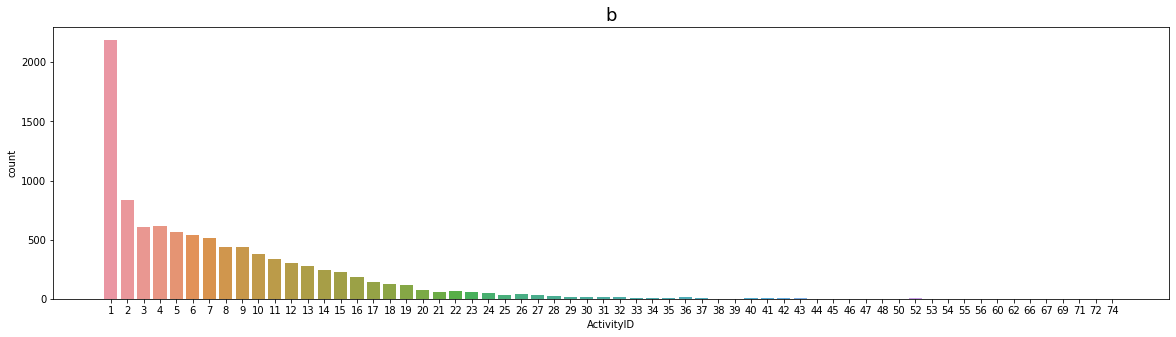

In [1]:
from t2e_utils import *
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")
import os
%load_ext autoreload
%autoreload 2


path = '../Tax_paper/data/'
b = os.path.join(path,'bpi_12_w.csv')
b = pd.read_csv(b)

df_dict = {
    'a': None,
    'b': b,
    'c': None,
    'd':None
}
range_dict = {
    'a': range(2,8,1),
    'b': range(2,22,2),
    'c': range(2,12,2),
    'd': range(2,22,2)
}

for key, dataset in df_dict.items():
    if key == 'b':
        plt.figure(figsize=(20,5))
        sns.countplot(dataset.groupby(["CaseID"]).agg({"ActivityID":'count'})["ActivityID"])
        plt.title(key,fontsize=18)
        plt.plot()

In [7]:
def grid_search(dataset, res, censored, cen_per):
    cols = ["suffix", "Layer_Size", "MAE", "unique_pred"]
    grid_results = pd.DataFrame(columns = cols)
    for suffix in range_dict[dataset]:
        print("\ndataset:", dataset, "\tSuffix:", suffix)
        t2e_obj = t2e(df_dict[dataset], 
                      suffix = suffix, 
                      resolution = res, 
                      censored = censored , 
                      cen_prc = cen_per)
        dataset_preprocessed = t2e_obj.preprocess()
        X_train, X_test, X_val, y_train, y_test, y_val = t2e_obj.smart_split(train_prc = 0.7,
                                                                             val_prc = 0.4,
                                                                             scaling=True)
        for layer_size in [4,8,16,32,128]:
            print("Layer size:",layer_size, end = " ..... ")
            t2e_obj.fit(X_train, y_train, X_val, y_val,size=layer_size, vb = False, seed=0)
            print("Done")
            test_result_df, mae, accuracy = t2e_obj.evaluate(X_test,y_test)            
            nunique = test_result_df["predicted_mode"].nunique()
            grid_results = grid_results.append(pd.DataFrame([[suffix,layer_size,mae,nunique]] , columns = cols), ignore_index=True)
            
    return grid_results

In [60]:
grid_results_censored = grid_search(dataset='b',res='s',censored=True,cen_per=0.4)


dataset: b 	Suffix: 2
	Total Observed: 4222
	Training data Observed: 1773
	Training data Censored: 2412
	Training data combined: 4185
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size: 4 ..... Done

dataset: b 	Suffix: 4
	Total Observed: 3473
	Training data Observed: 1459
	Training data Censored: 1939
	Training data combined: 3398
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size: 4 ..... Done

dataset: b 	Suffix: 6
	Total Observed: 2792
	Training data Observed: 1173
	Training data Censored: 1516
	Training data combined: 2689
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size: 4 ..... Done

dataset: b 	Suffix: 8
	Total Observed: 2186
	Training data Observed: 918
	Training data Censored: 1167
	Training data combined: 2085
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size: 4 ..... Done
Layer size:

In [ ]:
grid_results_censored = grid_search(dataset='b',res='s',censored=True,cen_per=0.4)


dataset: b 	Suffix: 2
	Total Observed: 4222
	Training data Observed: 1773
	Training data Censored: 2412
	Training data combined: 4185
Layer size: 4 ..... Done
Layer size: 8 ..... 

In [62]:
grid_results_censored

,suffix,Layer_Size,MAE,unique_pred
0,2,4,12.124904,719
1,2,4,11.932653,736
2,2,4,11.862514,755
3,2,4,11.496472,794
4,2,4,11.859022,802
5,4,4,10.179995,636
6,4,4,10.061681,639
7,4,4,9.939322,700
8,4,4,9.783878,733
9,4,4,9.759148,771


In [63]:
grid_results_censored --> to execute

,suffix,Layer_Size,MAE,unique_pred
0,2,4,12.049993,728
1,2,4,11.771203,764
2,2,4,12.061169,741
3,2,4,12.143474,795
4,2,4,12.572429,775
5,4,4,10.179995,636
6,4,4,10.061681,639
7,4,4,9.939322,700
8,4,4,9.783878,733
9,4,4,9.759148,771


In [ ]:
grid_results_censored.groupby(["suffix"]).agg({"MAE":"min"})

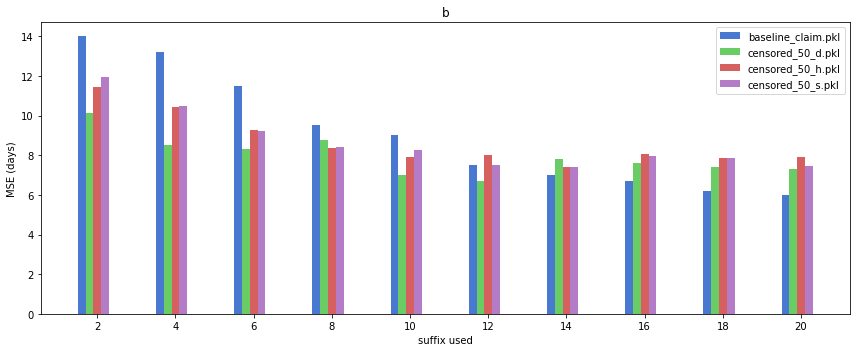

In [27]:
cases = ["baseline_claim.pkl", "observed_40_s.pkl", "censored_50_h.pkl", "censored_50_s.pkl"]

fig, ax = plt.subplots(1, 1, figsize=(12,5))

for i,dataset in enumerate(['b']):

    X = np.array(range_dict[dataset])
    steps = [-0.4, -0.2, 0, 0.2]
    for j,case in enumerate(cases):
        data = pickle.load(open(maes_path + case,"rb"));
        plt.bar(X+steps[j], data, width = 0.2, label=case);
    
    plt.xticks(range_dict[dataset])
    plt.legend();
    plt.xlabel("suffix used")
    plt.ylabel("MSE (days)")
    plt.title(dataset)
plt.tight_layout()
plt.show()

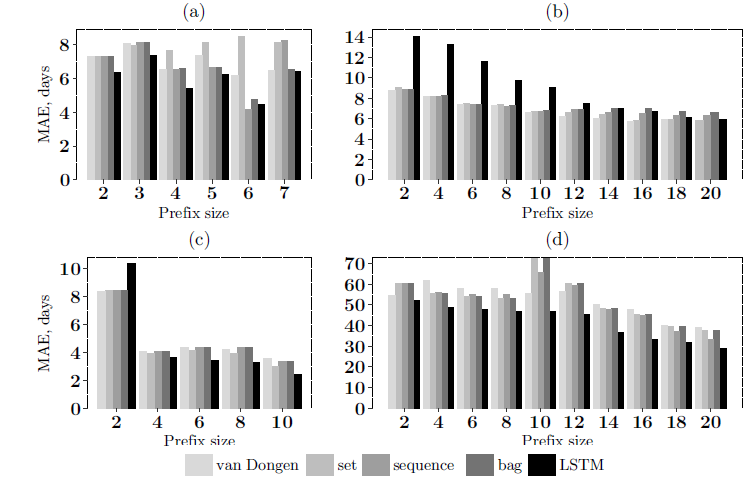